# Plot generation

This notebook reads the result files and generates plots. 

In [1]:
import pandas as pd

In [11]:
df = pd.read_csv('T-gate_costs.csv', delimiter  = ';', index_col = 'Methods')

In [12]:
df

,HF,ammonia
Methods,,
qDRIFT,2.180000e+24,4.730000e+24
Random Hamiltonian,3.420000e+24,1.830000e+26
Taylor naive,9.740000e+16,2.340000e+17
Taylor on-the-fly,4.840000e+19,6.010000e+19
Configuration Interaction,9.950000e+24,3.510000e+25
Low-depth Trotter,1.110000e+26,3.310000e+25
Low-depth Taylor naive,3.180000e+39,9.290000e+39
Low-depth Taylor on-the-fly,2.310000e+26,2.800000e+26
Linear T,4.990000e+15,2.660000e+15


In [13]:
df = df.T
df

Methods,qDRIFT,Random Hamiltonian,Taylor naive,Taylor on-the-fly,Configuration Interaction,Low-depth Trotter,Low-depth Taylor naive,Low-depth Taylor on-the-fly,Linear T,Sparsity low-rank,Interaction picture
HF,2.180000e+24,3.420000e+24,9.740000e+16,4.840000e+19,9.950000e+24,1.110000e+26,3.180000e+39,2.310000e+26,4.990000e+15,3.000000e+12,1.470000e+20
ammonia,4.730000e+24,1.830000e+26,2.340000e+17,6.010000e+19,3.510000e+25,3.310000e+25,9.290000e+39,2.800000e+26,2.660000e+15,8.930000e+12,6.750000e+19


KeyError: 'index'

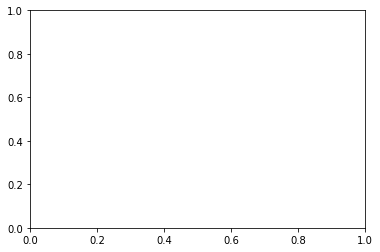

In [26]:
df.reset_index()
#df.plot.bar(logy = True)

KeyError: 'Methods'

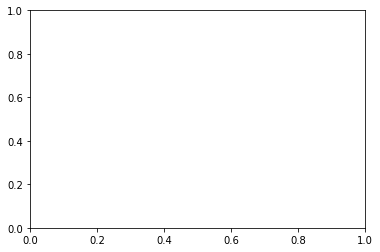

In [29]:
df.plot.scatter(x = 'Methods', y = 'qDRIFT')

In [32]:
df

Methods,qDRIFT,Random Hamiltonian,Taylor naive,Taylor on-the-fly,Configuration Interaction,Low-depth Trotter,Low-depth Taylor naive,Low-depth Taylor on-the-fly,Linear T,Sparsity low-rank,Interaction picture
HF,2.180000e+24,3.420000e+24,9.740000e+16,4.840000e+19,9.950000e+24,1.110000e+26,3.180000e+39,2.310000e+26,4.990000e+15,3.000000e+12,1.470000e+20
ammonia,4.730000e+24,1.830000e+26,2.340000e+17,6.010000e+19,3.510000e+25,3.310000e+25,9.290000e+39,2.800000e+26,2.660000e+15,8.930000e+12,6.750000e+19


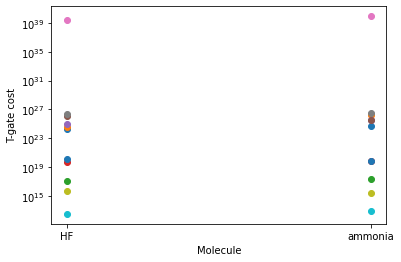

In [53]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

plt.xlabel("Molecule")
plt.ylabel("T-gate cost")
plt.yscale('log')
#plt.legend(loc='upper left')

# Function add a legend  
#plt.legend(list(df.columns), loc='upper left')

for col in df.columns:
    ax.scatter(df.index, df[col], label = col)

#ax.legend(loc='upper left')


plt.show()

In [ ]:
list(df.columns)

['qDRIFT',
 'Random Hamiltonian',
 'Taylor naive',
 'Taylor on-the-fly',
 'Configuration Interaction',
 'Low-depth Trotter',
 'Low-depth Taylor naive',
 'Low-depth Taylor on-the-fly',
 'Linear T',
 'Sparsity low-rank',
 'Interaction picture']